# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.  
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.  
  
#### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:  
• Country code  
• Country name  
  
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:  
  
• Restaurant Id: Unique id of every restaurant across various cities of the world  
• Restaurant Name: Name of the restaurant  
• Country Code: Country in which restaurant is located  
• City: City in which restaurant is located  
• Address: Address of the restaurant  
• Locality: Location in the city  
• Locality Verbose: Detailed description of the locality  
• Longitude: Longitude coordinate of the restaurant&#39;s location  
• Latitude: Latitude coordinate of the restaurant&#39;s location  
• Cuisines: Cuisines offered by the restaurant  
• Average Cost for two: Cost for two people in different currencies ��  
• Currency: Currency of the country  
• Has Table booking: yes/no  
• Has Online delivery: yes/ no  
• Is delivering: yes/ no  
• Switch to order menu: yes/no  
• Price range: range of price of food  
• Aggregate Rating: Average rating out of 5  
• Rating color: depending upon the average rating color  
• Rating text: text on the basis of rating of rating  
• Votes: Number of ratings casted by people  

### Problem statement: In this dataset predict 2 things:
  
1) Average Cost for two  
2) Price range  
  
Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import lazypredict

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_excel('https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx')
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [4]:
df2 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')
df2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df=pd.merge(df1,df2)
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


## Understanding the Data

In [6]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [8]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64
Restaurant Name
Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
                                      ..
Chor Bizarre - Hotel Broadway          1
Thugs - Hotel Broadway                 1
The Kylin Experience - Holiday Inn     1
Cafe on 3 - Holiday Inn                1
Fishpatrick's Crabby Cafe              1
Name: count, Length: 7446, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad

## Preparation of the Data

In [11]:
df = df.drop(['Switch to order menu', 'Restaurant ID', 'Address'], axis=1)

In [12]:
df.head()

,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,Jahanpanah,Agra,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,1,India,Time2Eat - Mama Chicken,Agra,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,1,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,1,India,Pinch Of Spice,Agra,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177


In [13]:
Cuisines_droppped = (df.query('Cuisines.isna()', engine='python'))
Cuisines_droppped

,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
9119,216,United States,Cookie Shoppe,Albany,Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,34
9122,216,United States,Pearly's Famous Country Cookng,Albany,Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,36
9129,216,United States,Jimmie's Hot Dogs,Albany,Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,1,3.9,Yellow,Good,160
9323,216,United States,Corkscrew Cafe,Gainesville,Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,3,3.9,Yellow,Good,209
9347,216,United States,Dovetail,Macon,Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,3,3.8,Yellow,Good,102
9363,216,United States,HI Lite Bar & Lounge,Miller,Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,1,3.4,Orange,Average,11
9384,216,United States,Hillstone,Orlando,Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,3,4.4,Green,Very Good,1158
9430,216,United States,Leonard's Bakery,Rest of Hawaii,Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,1,4.7,Dark Green,Excellent,707
9467,216,United States,Tybee Island Social Club,Savannah,Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,1,3.9,Yellow,Good,309


In [14]:
us_data = df[df['Country'] == 'United States']

In [15]:
us_data['Cuisines'].value_counts()

Cuisines
Mexican                          25
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: count, Length: 229, dtype: int64

In [16]:
df['Cuisines'] = df['Cuisines'].fillna('American')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant Name       9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

## Understanding Features

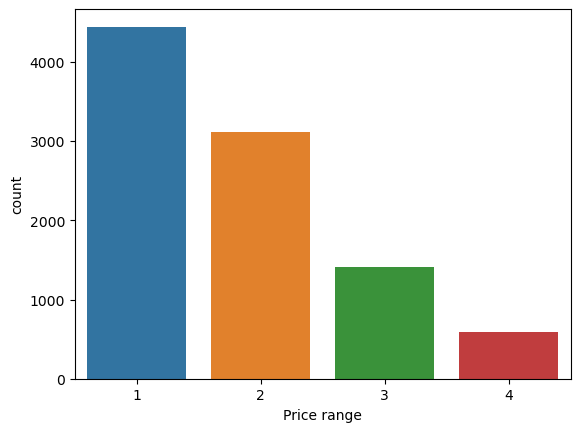

In [18]:
sns.countplot(x='Price range', data=df);

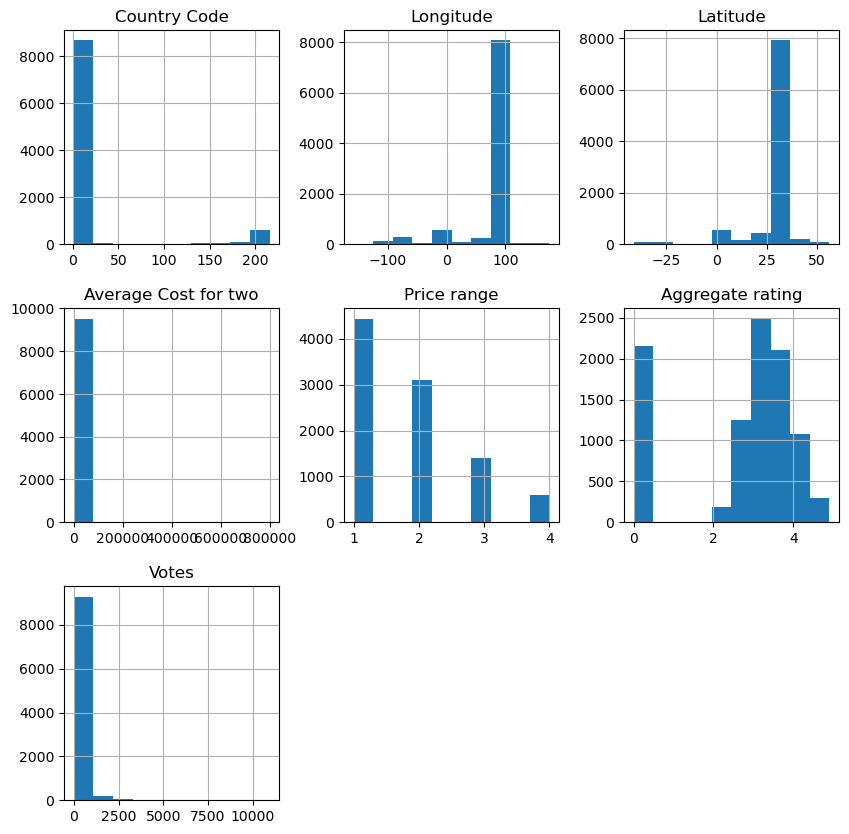

In [19]:
df.hist(bins=10,figsize=(10,10));

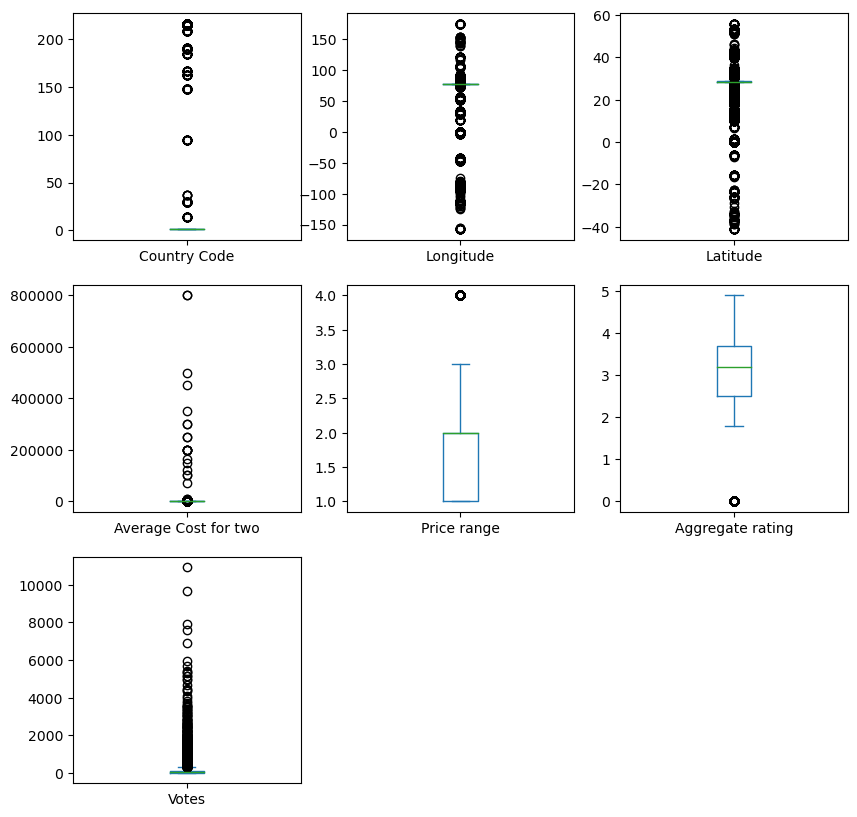

In [20]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10));

## Understanding Feature Relationships

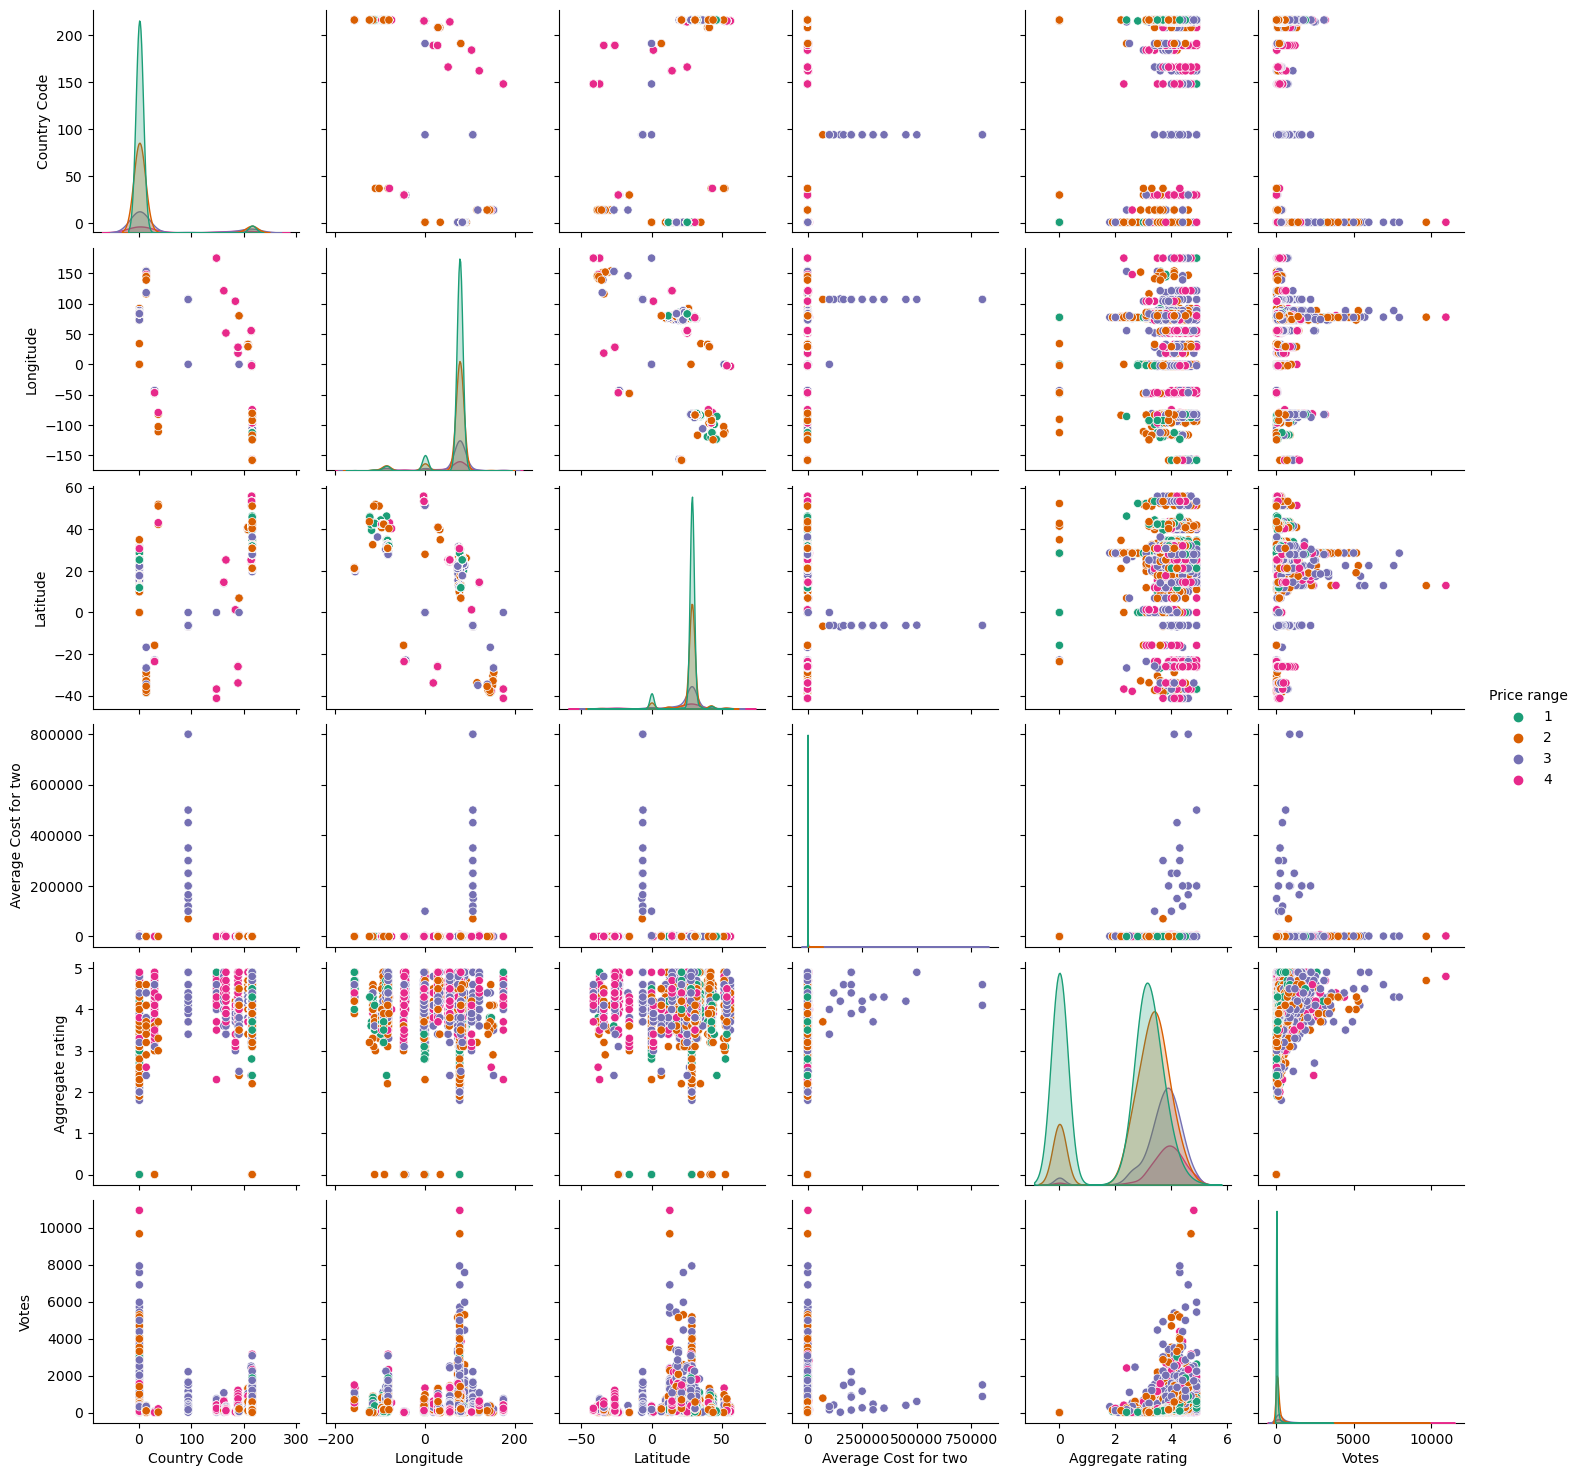

In [21]:
sns.pairplot(df, palette="Dark2", hue='Price range');

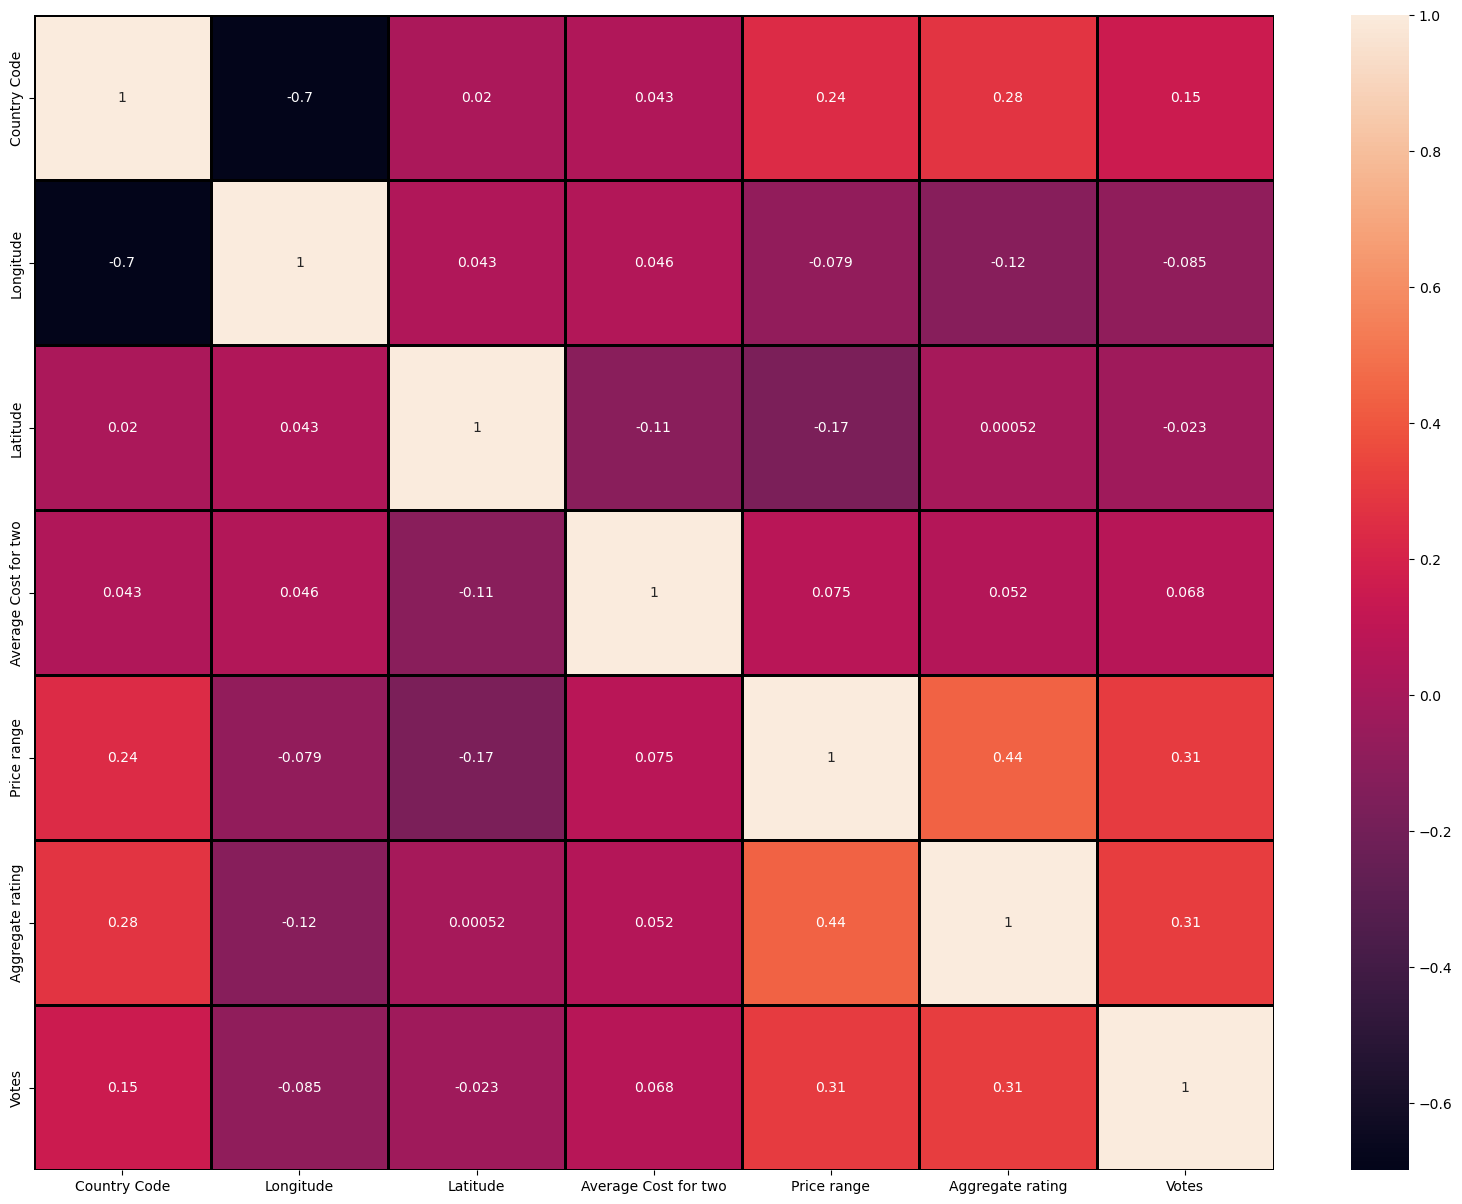

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=1, linecolor='black');

In [23]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3.0,3201.0,1.0,17.0,17.0,78.011544,27.161661,1514.0,850,4.0,0.0,0.0,0.0,3,3.9,5.0,2.0,140
1,1,3.0,5261.0,1.0,17.0,17.0,0.000000,0.000000,1514.0,700,4.0,0.0,0.0,0.0,2,3.5,5.0,2.0,71
2,1,3.0,6919.0,1.0,17.0,17.0,78.011608,27.160832,1306.0,500,4.0,0.0,0.0,0.0,2,3.6,5.0,2.0,94
3,1,3.0,1637.0,1.0,204.0,205.0,77.998092,27.195928,1645.0,400,4.0,0.0,0.0,0.0,2,4.0,1.0,5.0,87
4,1,3.0,4922.0,1.0,204.0,205.0,78.007553,27.201725,1373.0,1000,4.0,0.0,0.0,0.0,3,4.2,1.0,5.0,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,14.0,6794.0,135.0,1174.0,1231.0,-92.335523,42.498400,18.0,10,2.0,0.0,0.0,0.0,1,3.7,5.0,2.0,101
9547,216,14.0,6839.0,135.0,1174.0,1231.0,-92.335769,42.497919,1795.0,10,2.0,0.0,0.0,0.0,1,3.5,5.0,2.0,58
9548,216,14.0,6945.0,135.0,1174.0,1231.0,-92.323400,42.465580,1125.0,25,2.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156
9549,216,14.0,6883.0,136.0,1176.0,1233.0,-80.529488,40.396043,317.0,25,2.0,0.0,0.0,0.0,2,3.9,5.0,2.0,156


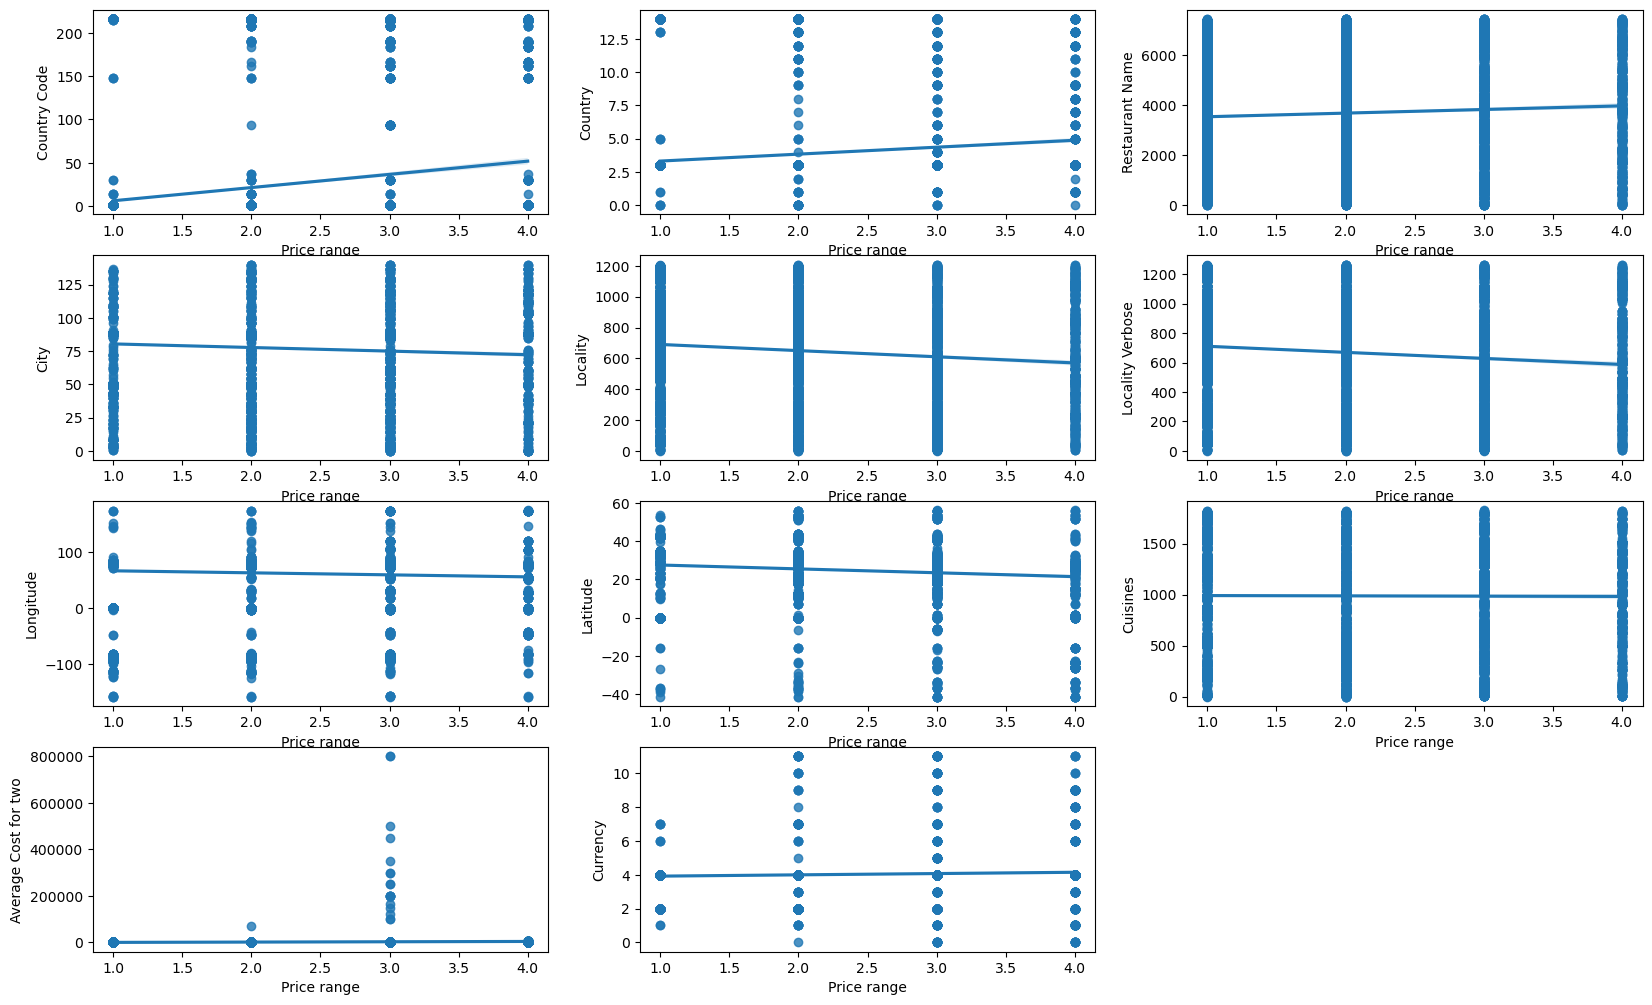

In [24]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(8,3,p)
        sns.regplot(x='Price range', y=i, data=df)
        plt.xlabel('Price range')
        plt.ylabel(i)
    p+=1
plt.show()

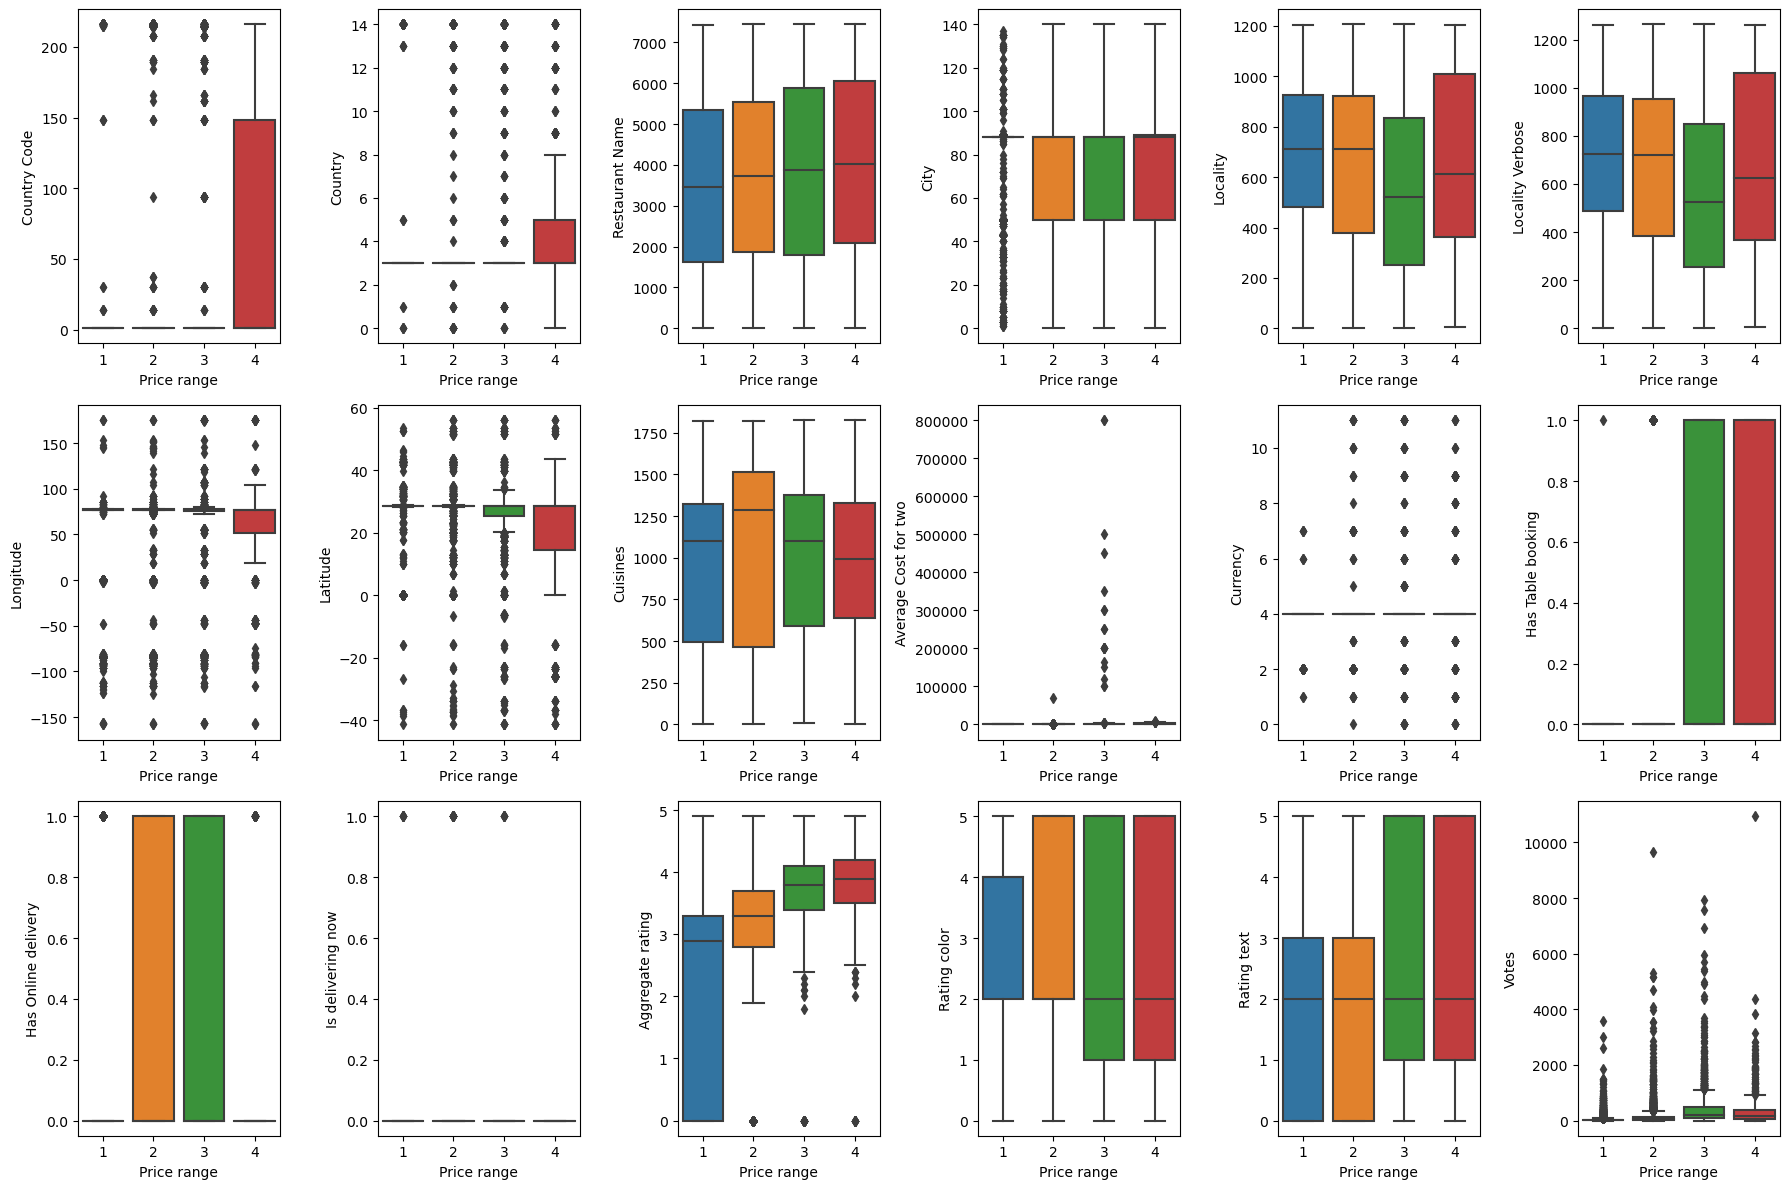

In [25]:
fig, axs = plt.subplots(3, 6, figsize=(18,12))
features = df.drop('Price range', axis=1).columns
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(x='Price range', y=features[i], data=df, ax=ax)
plt.tight_layout()
plt.show()

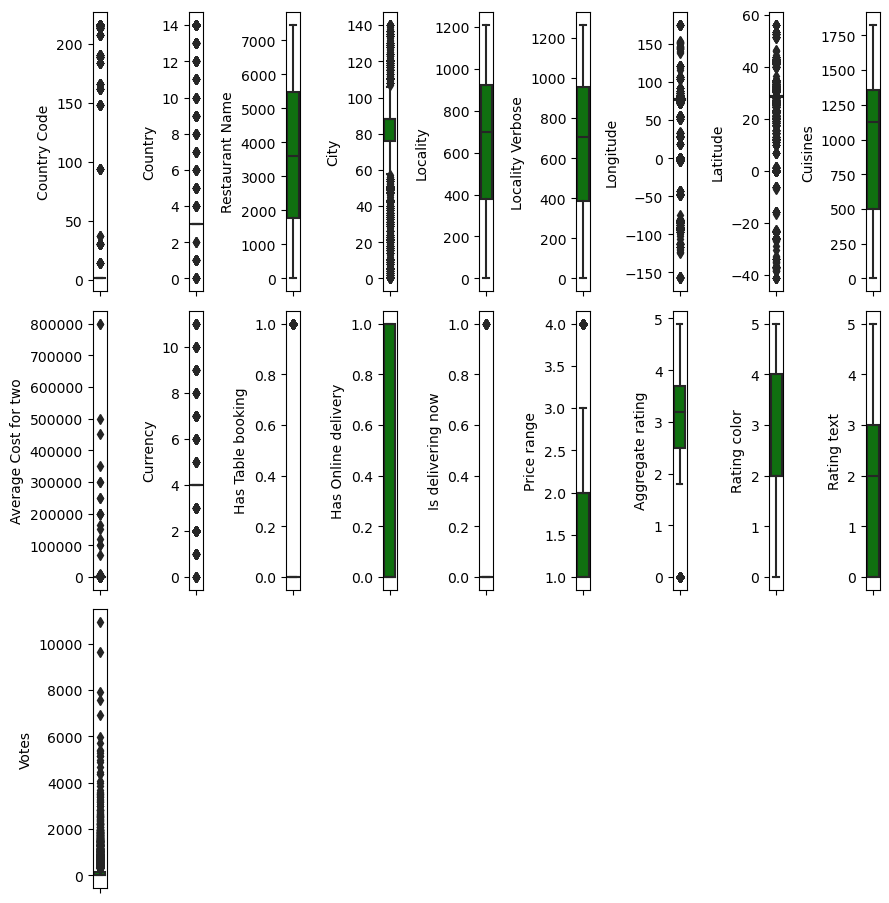

In [26]:
#checking outliers

collist=df.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df[collist[i]], color='green', orient='x')
    plt.tight_layout()

## Model Preparation - Price range

In [27]:
df_skew = df.skew()
df_skew

Country Code             3.043965
Country                  3.312721
Restaurant Name          0.044637
City                    -1.193777
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305654
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [28]:
for index, value in df_skew.items():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

Country Code             2.923867
Country                  2.203261
Restaurant Name          0.044637
City                    -2.790853
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.928779
Latitude                -3.856661
Cuisines                -0.305654
Average Cost for two     9.626632
Currency                -3.580645
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.495755
Aggregate rating        -1.272627
Rating color             0.046009
Rating text              0.431408
Votes                    1.204920
dtype: float64

In [29]:
x = df.drop(['Price range'], axis=1)
y = df[['Price range']]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,17.521072,Country Code
1,322.550948,Country
2,3.915123,Restaurant Name
3,44.942199,City
4,5090.336250,Locality
5,4919.542391,Locality Verbose
6,13.676741,Longitude
7,18.437967,Latitude
8,4.855339,Cuisines
9,8.143823,Average Cost for two


In [31]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [32]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,9.335003,Country Code
1,11.465626,Country
2,1.007704,Restaurant Name
3,1.126197,City
4,953.932387,Locality
5,952.531563,Locality Verbose
6,3.763567,Longitude
7,2.605678,Latitude
8,1.044126,Cuisines
9,1.427260,Average Cost for two


In [33]:
x = x.drop(['Locality Verbose'], axis=1)

In [34]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,9.333049,Country Code
1,11.465404,Country
2,1.007695,Restaurant Name
3,1.116903,City
4,1.057094,Locality
5,3.762807,Longitude
6,2.605675,Latitude
7,1.043728,Cuisines
8,1.426746,Average Cost for two
9,1.660089,Currency


In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation - Price range

In [36]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

 98%|█████████▊| 41/42 [00:52<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1799
[LightGBM] [Info] Number of data points in the train set: 7163, number of used features: 17
[LightGBM] [Info] Start training from score 1.184678


100%|██████████| 42/42 [00:53<00:00,  1.27s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.99       0.99  0.02        7.34
LGBMRegressor                                0.99       0.99  0.02        1.18
HistGradientBoostingRegressor                0.99       0.99  0.02        3.04
XGBRegressor                                 0.99       0.99  0.02        0.93
BaggingRegressor                             0.99       0.99  0.02        0.68
ExtraTreesRegressor                          0.99       0.99  0.02        1.84
GradientBoostingRegressor                    0.98       0.98  0.02        3.75
DecisionTreeRegressor                        0.98       0.98  0.03        0.11
ExtraTreeRegressor                           0.96       0.96  0.04        0.04
AdaBoostRegressor                            0.94       0.94  0.05        0.57
NuSVR                                        0.87   

## Model Evaluation - Price range

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr_clf = RandomForestRegressor()

In [38]:
rfr_clf.fit(xtrain,ytrain)

RandomForestRegressor()

In [39]:
grid_params = {'n_estimators' : [100, 300, 500], 
              'criterion':['squared_error', 'absolute_error'], 
              'max_features':['sqrt', 'log2'], 
              'min_samples_split':[2, 10, 50],
              'max_depth':[5, 15, 30]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rfr_clf, param_grid=grid_params, cv=2, verbose=3)

In [41]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.901 total time=   0.9s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.882 total time=   0.9s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.892 total time=   2.9s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.882 total time=   3.1s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.889 total time=   3.6s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.879 total time=   2.1s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=10,

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 15, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100, 300, 500]},
             verbose=3)

In [42]:
grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 300}

## Final Model - Price range

When comparing models Regressor had the highest adjusted r2 score of 0.99 and r2 score of 0.99 with the lowest RMSE of 0.02. It did have a long training time of 2.43, but that wasn't much of a factor due to the size of the dataset.

In [43]:
Final_model = RandomForestRegressor(criterion='absolute_error', max_depth=30, max_features='log2', min_samples_split=2, n_estimators=500)

In [44]:
Final_model.fit(xtrain,ytrain)

RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      max_features='log2', n_estimators=500)

In [45]:
from sklearn.metrics import r2_score

rd_pred= Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  97.84543118215178


## Model Preparation - Average Cost for two

In [46]:
xT = df.drop(['Average Cost for two'], axis=1)
yT = df[['Average Cost for two']]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xT.values,i)
                        for i in range(len(xT.columns))]
vif["Features"] = xT.columns

vif

,VIF values,Features
0,17.15,Country Code
1,326.24,Country
2,3.93,Restaurant Name
3,45.87,City
4,5090.30,Locality
5,4919.62,Locality Verbose
6,13.12,Longitude
7,18.16,Latitude
8,4.88,Cuisines
9,199.20,Currency


In [48]:
scaler = preprocessing.StandardScaler()
xT = pd.DataFrame(scaler.fit_transform(xT), columns = xT.columns)

In [49]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(xT.values,i)
                        for i in range(len(xT.columns))]
vif["Features"] = xT.columns

vif

,VIF values,Features
0,9.36,Country Code
1,11.42,Country
2,1.01,Restaurant Name
3,1.13,City
4,954.48,Locality
5,953.08,Locality Verbose
6,3.60,Longitude
7,2.53,Latitude
8,1.05,Cuisines
9,1.66,Currency


In [50]:
xTtrain,xTtest,yTtrain,yTtest = train_test_split(xT,yT,test_size = .25, random_state = 39)

## Model Creation - Average Cost for two

In [51]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
reg_models, predictions = reg.fit(xTtrain, xTtest, yTtrain, yTtest)
print(reg_models)

100%|██████████| 42/42 [00:30<00:00,  1.37it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1977
[LightGBM] [Info] Number of data points in the train set: 7163, number of used features: 18
[LightGBM] [Info] Start training from score 7.778549
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.95       0.95  0.74        5.53
XGBRegressor                                 0.94       0.94  0.79        0.41
BaggingRegressor                             0.94       0.94  0.80        0.53
GradientBoostingRegressor                    0.93       0.93  0.83        1.55
ExtraTreesRegressor                          0.93       0.93  0.84        1.64
LGBMRegressor                          

## Model Evaluation - Average Cost for two

In [52]:
from sklearn.ensemble import RandomForestRegressor
Trfr_clf = RandomForestRegressor()

In [53]:
Trfr_clf.fit(xTtrain,yTtrain)

RandomForestRegressor()

In [54]:
Tgrid_params = {'n_estimators' : [100, 300, 500], 
              'criterion':['squared_error', 'absolute_error'], 
              'max_features':['sqrt', 'log2'], 
              'min_samples_split':[2, 10, 50],
              'max_depth':[5, 15, 30]}

In [55]:
from sklearn.model_selection import GridSearchCV
Tgrid_search = GridSearchCV(estimator=Trfr_clf, param_grid=Tgrid_params, cv=2, verbose=3)

In [56]:
Tgrid_search.fit(xTtrain,yTtrain)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.717 total time=   0.3s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.3s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.699 total time=   1.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.835 total time=   0.8s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.701 total time=   1.3s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.839 total time=   1.3s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, min_samples_split=10,

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 15, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100, 300, 500]},
             verbose=3)

In [57]:
Tgrid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

## Final Model - Average Cost for two

When comparing models Regressor had the highest adjusted r2 score of 0.95 and r2 score of 0.95 with the lowest RMSE of 0.74. It did have a long training time of 5.05, but that wasn't much of a factor due to the size of the dataset.

In [58]:
Final_model_T = RandomForestRegressor(criterion='absolute_error', max_depth=30, max_features='log2', min_samples_split=2, n_estimators=100)

In [59]:
Final_model_T.fit(xTtrain,yTtrain)

RandomForestRegressor(criterion='absolute_error', max_depth=30,
                      max_features='log2')

In [60]:
from sklearn.metrics import r2_score

Trd_pred= Final_model_T.predict(xTtest)
Tr2s=r2_score(yTtest, Trd_pred)
print('r2 score: ', Tr2s*100)

r2 score:  92.03771784478268
